In [1]:
using XLSX, DataFrames, TimeSeries
using StatsBase
using Plots, StatsPlots
using LinearAlgebra
using GLM
using FredData
include("../utils.jl")


print_percentiles (generic function with 3 methods)

In [2]:
columns = [:Date, :short_pl, :short_us, :short_ez, :cpi_pl, :cpi_us, :cpi_ez, :real_pln, :real_us, :real_ez, :term_pln, :term_us,	:term_ez, :real_pln_usa, :real_pln_ez,	:usdpln,	:eurpln,	:usdpln_ret,	:eurpln_ret, :real_usdpln, :real_eurpln, :real_usdpln_ret, :real_eurpln_ret]

23-element Vector{Symbol}:
 :Date
 :short_pl
 :short_us
 :short_ez
 :cpi_pl
 :cpi_us
 :cpi_ez
 :real_pln
 :real_us
 :real_ez
 ⋮
 :real_pln_ez
 :usdpln
 :eurpln
 :usdpln_ret
 :eurpln_ret
 :real_usdpln
 :real_eurpln
 :real_usdpln_ret
 :real_eurpln_ret

In [3]:
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Macro_Data_2001"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
data = TimeArray(data_df,timestamp=:Date) |> x -> from(x,Date(2003,01,01)) |> x -> to(x,Date(2023,12,30))

84×22 TimeArray{Float64, 2, Date, Matrix{Float64}} 2003-01-01 to 2023-10-01
┌────────────┬───────────┬────────────┬─────────────┬─────────────┬─────────────
│            │ short_pl  │ short_us   │ short_ez    │ cpi_pl      │ cpi_us     ⋯
├────────────┼───────────┼────────────┼─────────────┼─────────────┼─────────────
│ 2003-01-01 │    0.0624 │  0.0126333 │   0.0268307 │  0.00559352 │   0.010119 ⋯
│ 2003-04-01 │ 0.0554333 │  0.0116667 │   0.0236191 │  0.00370831 │  0.0036429 ⋯
│ 2003-07-01 │ 0.0520667 │     0.0107 │   0.0213926 │ -0.00523402 │  0.0049001 ⋯
│ 2003-10-01 │ 0.0576333 │  0.0110333 │   0.0214965 │  0.00990396 │ 0.00018051 ⋯
│ 2004-01-01 │ 0.0548333 │  0.0105333 │   0.0206295 │  0.00735526 │  0.0090286 ⋯
│ 2004-04-01 │ 0.0596667 │  0.0124667 │   0.0208243 │   0.0200792 │   0.014316 ⋯
│ 2004-07-01 │ 0.0677333 │  0.0170333 │    0.021163 │    0.006263 │  0.0035285 ⋯
│ 2004-10-01 │    0.0675 │     0.0225 │   0.0216361 │  0.00859507 │  0.0059775 ⋯
│     ⋮      │     ⋮     │     ⋮ 

In [4]:
returns_summarystats(data,1)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_pl,0.02,0.0727,0.0372,0.0523,0.0021,-0.0256,0.0173,0.9428,-1.1478,1.8579,0.0416
short_us,0.0178,0.0543,0.017,0.0276,0.001,0.9834,0.0024,0.9403,-0.4036,0.9573,0.0108
short_ez,0.0162,0.0498,0.0117,0.0214,-0.0057,0.8006,-0.0031,0.9494,-0.5317,0.722,0.0067
cpi_pl,0.0113,0.0587,0.0081,0.0127,-0.0065,1.8238,0.0012,0.6031,4.543,0.7133,0.0053
cpi_us,0.008,0.0297,0.0063,0.0113,-0.0283,-0.5115,0.0025,0.2934,3.6977,0.7941,0.0054
cpi_ez,0.008,0.0335,0.0053,0.0111,-0.0108,0.7016,-0.0003,0.0046,0.646,0.6599,0.0037
real_pln,0.0107,0.0196,0.0013,0.0089,-0.0408,-1.2633,-0.0021,0.5811,2.264,0.1202,0.0027
real_us,0.0088,0.0357,-0.002,0.0025,-0.0259,0.6104,-0.006,0.375,3.696,-0.2313,-0.002
real_ez,0.0087,0.0129,-0.0023,0.004,-0.0338,-0.8951,-0.007,0.1449,1.0268,-0.2689,-0.0007
term_pln,0.008,0.0212,0.0081,0.0147,-0.0096,-0.4747,0.0029,0.8248,-0.71,1.0139,0.0099


In [5]:
returns_summarystats(log1p.(data),4)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_pl,0.0386,0.2807,0.1454,0.204,0.0084,-0.0502,0.0685,0.9434,-1.1455,3.7631,0.1628
short_us,0.0347,0.2114,0.067,0.109,0.004,0.9671,0.0095,0.9406,-0.4363,1.9296,0.0428
short_ez,0.0318,0.1945,0.046,0.0848,-0.0227,0.7811,-0.0124,0.9498,-0.5723,1.4457,0.0269
cpi_pl,0.0222,0.2282,0.0319,0.0505,-0.0262,1.7713,0.0048,0.6002,4.2775,1.4354,0.0211
cpi_us,0.0159,0.1172,0.0251,0.0451,-0.1148,-0.5767,0.0102,0.2907,3.887,1.5819,0.0216
cpi_ez,0.0159,0.1317,0.021,0.0442,-0.0434,0.6763,-0.0012,0.0012,0.5814,1.319,0.0148
real_pln,0.0215,0.0776,0.0049,0.0354,-0.1665,-1.3065,-0.0082,0.5837,2.4234,0.2283,0.0108
real_us,0.0177,0.1403,-0.0083,0.0101,-0.1049,0.5411,-0.0242,0.3786,3.5097,-0.4719,-0.0079
real_ez,0.0174,0.0512,-0.0095,0.0161,-0.1377,-0.9243,-0.0282,0.1483,1.1169,-0.5436,-0.0027
term_pln,0.0158,0.0838,0.032,0.0583,-0.0386,-0.4873,0.0116,0.8243,-0.6962,2.0243,0.0395


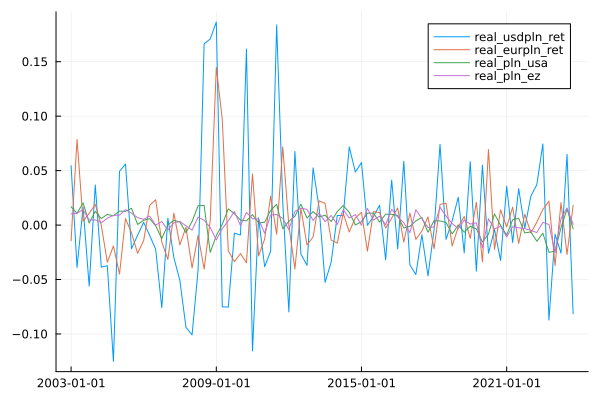

In [6]:
plot(data[[:real_usdpln_ret, :real_eurpln_ret, :real_pln_usa, :real_pln_ez]])

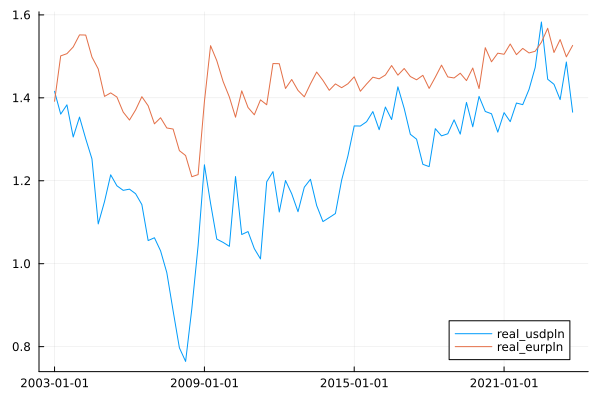

In [7]:
plot(data[[:real_usdpln, :real_eurpln]])

In [8]:
DataFrame(cor(values(data[:cpi_pl, :cpi_ez, :cpi_us])), [:pl, :ez, :us])

Row,pl,ez,us
,Float64,Float64,Float64
1,1.0,0.677306,0.52373
2,0.677306,1.0,0.605593
3,0.52373,0.605593,1.0


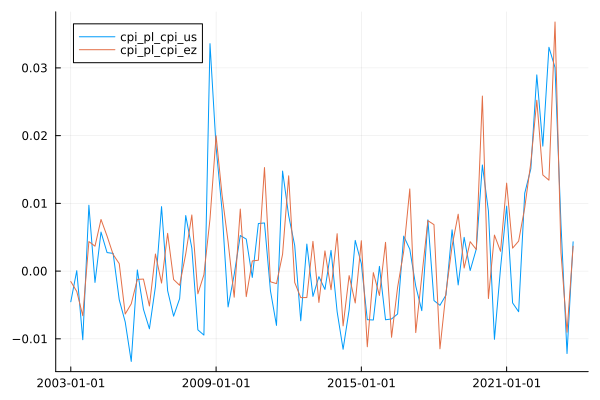

In [9]:
cpi_us_diff = data[:cpi_pl] .- data[:cpi_us]
cpi_ez_diff = data[:cpi_pl] .- data[:cpi_ez]
plot(cpi_us_diff)
plot!(cpi_ez_diff)

In [10]:
returns_summarystats(merge(cpi_us_diff, cpi_ez_diff),4)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
cpi_pl_cpi_us,0.0197,0.1343,0.0069,0.0252,-0.0533,1.2816,-0.0226,0.408,1.8871,0.3498,0.0003
cpi_pl_cpi_ez,0.0166,0.1471,0.0111,0.0221,-0.0459,1.2884,-0.0112,0.228,2.856,0.6671,0.01


In [13]:
DataFrame(cor(values(data[:cpi_pl, :usdpln_ret])), [:cpi_pl, :usdpln_ret])

Row,cpi_pl,usdpln_ret
,Float64,Float64
1,1.0,-0.0288638
2,-0.0288638,1.0


In [29]:
y3 = moving(sum, log1p.(data[:cpi_pl, :usdpln_ret]), 12)
DataFrame(cor(values(y3)), [:cpi_pl, :usdpln_ret])

Row,cpi_pl,usdpln_ret
,Float64,Float64
1,1.0,0.0403116
2,0.0403116,1.0
